In [1]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.


In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_FIA.csv', DATA))
head(data)

lon       lat      etopo1   beetleAcres host forest mStdAge   density  vcc
1 -124.1712 40.22942 365.1772   0.80      1    1       25.50000 58050.83 1  
2 -124.0860 40.42007 493.0852   0.80      0    1       42.46217 52809.04 1  
3 -123.9379 40.25447 487.5240   0.80      1    1      169.82977 54385.98 1  
4 -123.9535 40.34353 350.6961   0.80      0    1      249.11995 47005.25 1  
5 -124.2945 42.21193 387.5008   2.10      1    1      102.39621 51167.16 3  
6 -124.3114 42.30082 409.5534 331.05      1    1       83.12288 54697.57 3  
  mfri ⋯ Tmin     winterMin summerTmean Pmean    summerP1 minT      JanMin     
1 2    ⋯ 3.799283 -1.050936 13.39157    147.6052 24.63396 -1.142272  0.77218069
2 2    ⋯ 3.858750 -1.872970 14.15700    136.2772 25.59386 -1.986082 -0.02538966
3 2    ⋯ 3.853568 -2.322706 15.26891    131.7037 22.97331 -2.402099 -0.42077545
4 2    ⋯ 4.731104 -2.289419 15.96638    127.5623 21.96572 -2.376570 -0.38369531
5 2    ⋯ 3.569939 -1.609584 14.75741    144.9382 63.31930 -1.701227  0.26865842
6 2    ⋯ 2.772311 -1.861916 14.02822    145.8606 65.28476 -1.954968  0.04758294
  TOctSep  Jan20 PcumOctSep
1 10.28896 0     3588.627  
2 10.65948 0     3310.186  
3 11.30121 0     3203.155  
4 12.05334 0     3101.846  
5 10.65064 0     3508.975  
6  9.89128 0     3531.298

In [3]:
cor.test(data$mStdAge, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$mStdAge and log(data$beetleAcres)
t = 7.8637, df = 7634, p-value = 4.241e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06734481 0.11184436
sample estimates:
       cor 
0.08963932 


In [4]:
cor.test(data$density, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$density and log(data$beetleAcres)
t = 8.1751, df = 7634, p-value = 3.434e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07087692 0.11534762
sample estimates:
       cor 
0.09315873 


In [5]:
# GAM iteration
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep),
    data=data) # GCV = 2.3865
proc.time() - ptm

   user  system elapsed 
 16.436   0.305  17.025 

In [6]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + 
    te(mStdAge) + te(density) + te(vcc) + te(mfri) + te(prs) + 
    te(pms) + te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + 
    te(maxAugT) + te(summerP0) + te(Tmean) + te(mi) + te(Tvar) + 
    te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + te(AugTmax) + 
    te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + 
    te(MarTmin) + te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + 
    te(Pmean) + te(summerP1) + te(minT) + te(JanMin) + te(TOctSep) + 
    te(Jan20) + te(PcumOctSep)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.98043    0.09378  42.446  < 2e-16 ***
host         0.32890    0.08831   3.724 0.000197 ***
forest       0.14679    0.04057   3.618 0.000299 ***
GAP1        -0.19059    0.06431  -2.963 0.003052 ** 

In [7]:
gam.table <- rbind(summary(mod)$p.table, summary(mod)$s.table)
rownames(gam.table[-1,][order(gam.table[-1,][,4], decreasing = TRUE),])[1]

[1] "te(summerP2)"

In [10]:
summary(mod)$sp.criterion # initial value: 2.3865351476502

GCV.Cp 
2.386538

In [9]:
# GAM iteration: te(summerP2)
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + summerP2 + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep),
    data=data) # GCV = 2.3865
proc.time() - ptm

   user  system elapsed 
 13.721   0.336  14.249 

In [20]:
bstar = NULL # Rows of bstar will be bootstrap vectors of regression coefficients.
n = dim(data)[1] 
B = 1000
ptm <- proc.time()
for(draw in 1:B){
  # Randomly sample from the rows, with replacement
  Dstar = data[sample(1:n,size=n,replace=T),]
  model <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + I(cwd^2) + 
    I(maxAugT^2) + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) + 
    wd + I(wd^2) + AugTmean + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + MarMin + 
    ddAugJun + ddAugJul + I(ddAugJul^2) + PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + I(maxT^2) + Tmin + winterMin + summerTmean + 
    Pmean + I(Pmean^2) + I(summerP1^2) + minT + JanMin + I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + PcumOctSep + 
    I(PcumOctSep^2),
    data=Dstar)
  bstar = rbind( bstar,coef(model) )
  # print(draw)
} # Next draw
proc.time() - ptm

   user  system elapsed 
100.044  10.656 142.921 

In [21]:
bstar <- as.data.frame(bstar)
head(bstar)

(Intercept) lon       I(lon^2)    lat      I(lat^2)    etopo1     
1 -26.236299  0.8537563 0.004844241 2.804601 -0.03581349 0.003395995
2  10.444486  1.5415032 0.007699060 3.191117 -0.04068679 0.003916049
3   2.742819  1.1228823 0.005779197 2.723259 -0.03542151 0.003350912
4  41.691889  1.8161824 0.008603989 2.490899 -0.03170367 0.003352173
5  67.693462  2.5082259 0.012122987 2.815214 -0.03609127 0.003592821
6  39.487932  1.9288419 0.009586131 2.499743 -0.03252688 0.003615956
  I(etopo1^2)   mStdAge     I(mStdAge^2)  density      ⋯ I(Pmean^2) 
1 -4.273488e-07 0.003154578 -7.465163e-06 4.346586e-05 ⋯ -0.02004206
2 -6.153917e-07 0.004942371 -1.312393e-05 3.183351e-05 ⋯ -0.01915190
3 -4.924563e-07 0.006798592 -2.246375e-05 3.878264e-05 ⋯ -0.01992817
4 -4.776783e-07 0.003299808 -9.841620e-06 3.287905e-05 ⋯ -0.01471926
5 -4.804834e-07 0.003924880 -1.229815e-05 3.546068e-05 ⋯ -0.02111296
6 -4.712581e-07 0.002832075 -8.926863e-06 3.640123e-05 ⋯ -0.01765609
  I(summerP1^2) minT       JanMin     I(JanMin^2)  TOctSep   Jan20     
1 -0.01565878   -1.4793169 -0.1711063 -0.009621502 -56.64788 -0.7609995
2 -0.02020139   -1.1438109 -0.1924907 -0.010662815 -92.56040 -0.6407049
3 -0.01193221   -1.1557847 -0.1661198 -0.008417445 -76.81134 -0.9067200
4 -0.01187753   -0.7947165 -0.1862572 -0.006817503 -92.70980 -0.8228067
5 -0.02814165   -0.9413348 -0.3225595 -0.011528453 -98.57313 -0.6067276
6 -0.01538470   -1.2191838 -0.1997362 -0.012749040 -66.16343 -0.6850322
  I(Jan20^2) PcumOctSep I(PcumOctSep^2)
1 0.1726028  -0.1424960 3.750069e-05   
2 0.1723063  -0.1447114 3.608349e-05   
3 0.1880057  -0.1444426 3.655307e-05   
4 0.1584736  -0.1153153 2.674250e-05   
5 0.1564807  -0.1779315 3.911571e-05   
6 0.1665846  -0.1579768 3.224579e-05

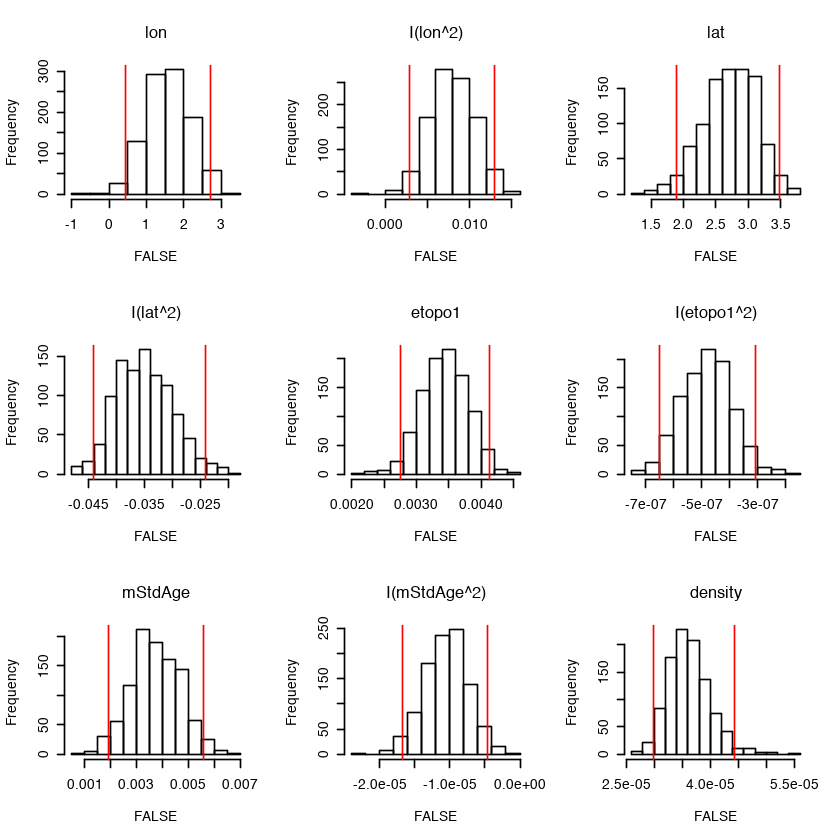

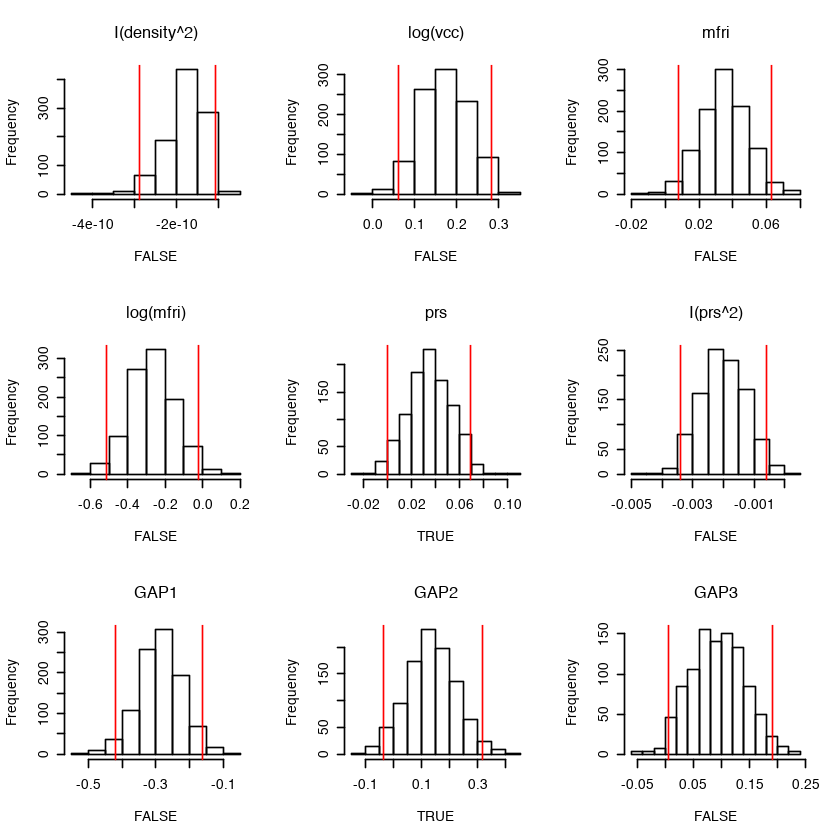

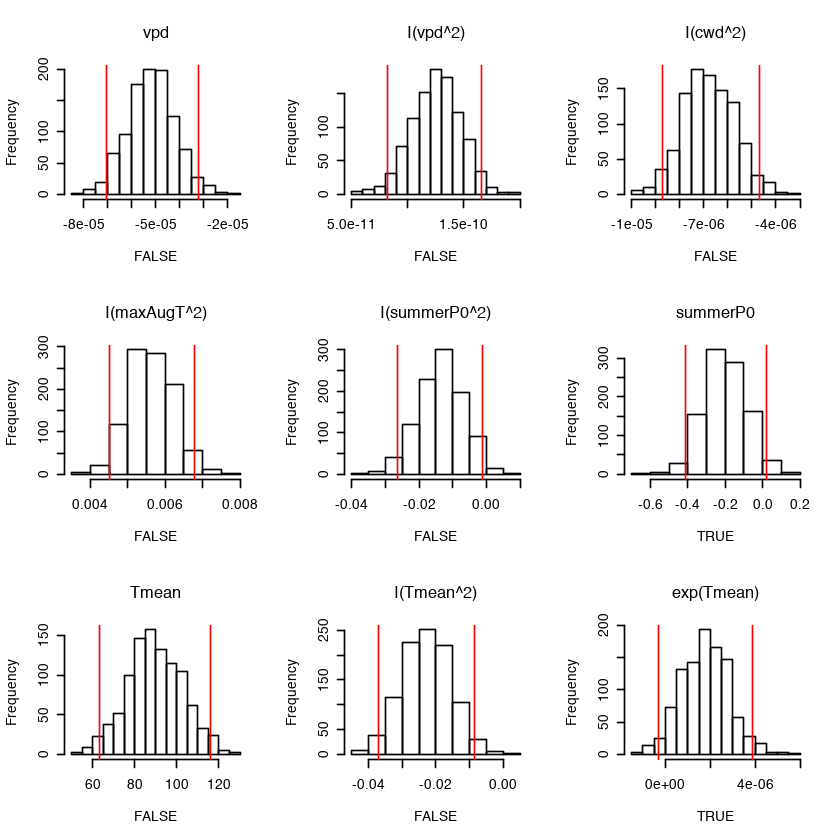

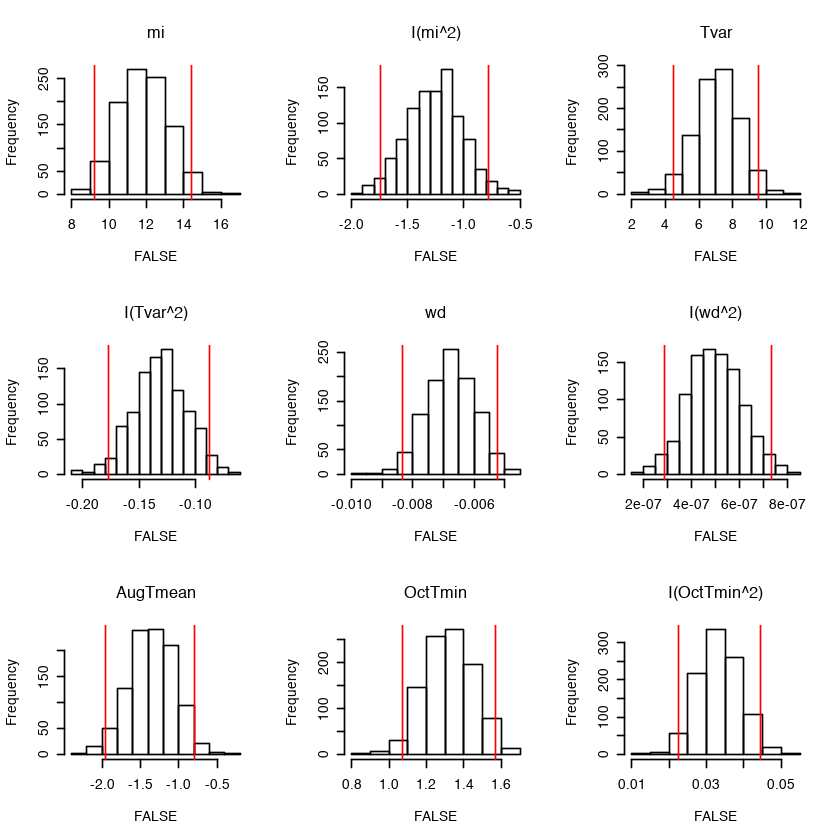

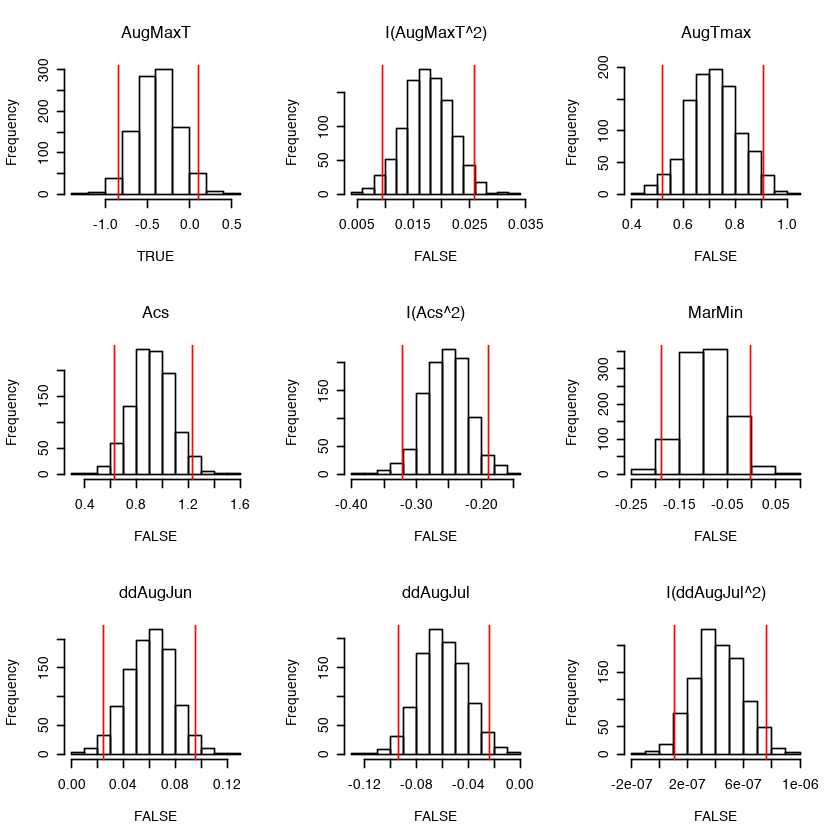

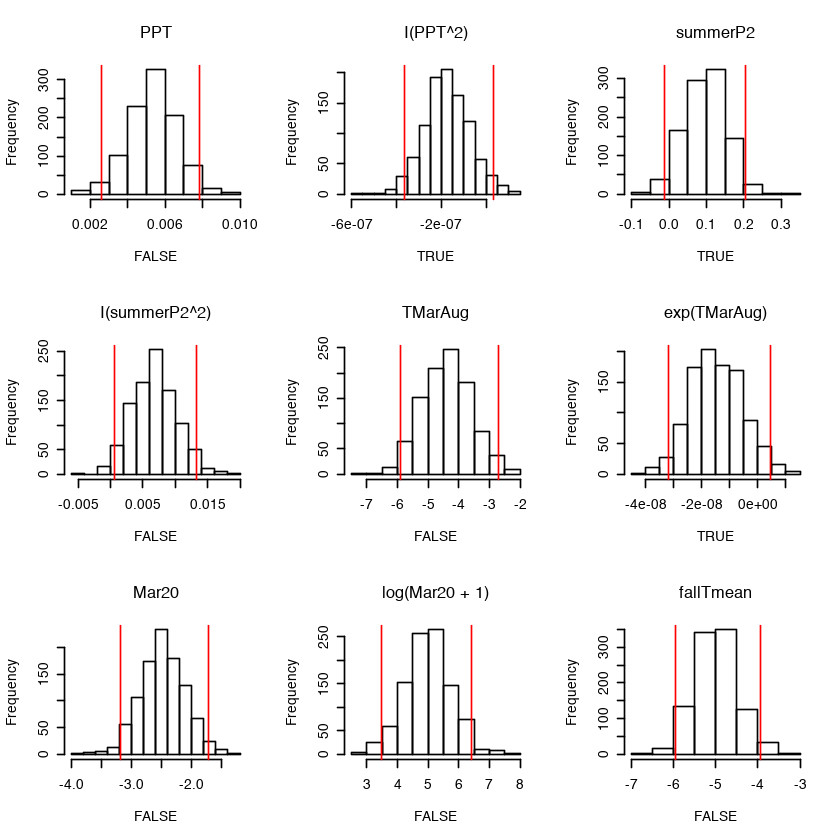

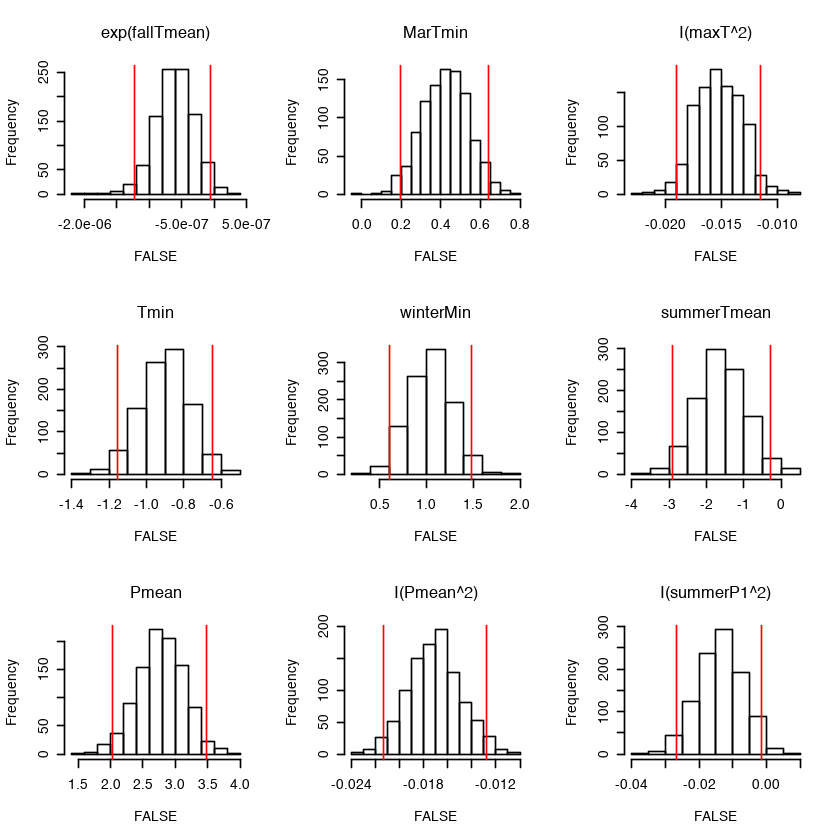

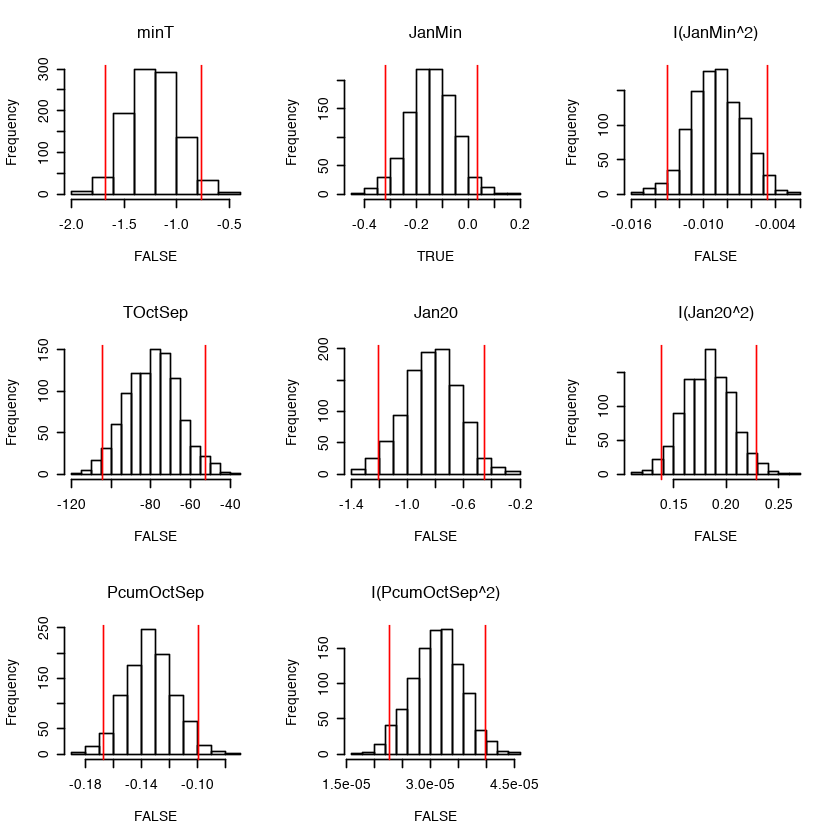

In [22]:
par(mfrow=c(3, 3))
removable <- c()
for (field in names(bstar)) {
    if(!(field %in% c('(Intercept)', 'summerP1'))){
        qs <- quantile(bstar[,field], prob=c(0.025, 0.975))
        remove <- 0 >= qs[1] & 0 <= qs[2]
        hist(bstar[,field], main=field, xlab=remove)
        abline(v=qs,col="red")
        if(remove){removable <- c(removable, field)}
    }
}

In [23]:
removable

[1] "prs"          "GAP2"         "summerP0"     "exp(Tmean)"   "AugMaxT"     
[6] "I(PPT^2)"     "summerP2"     "exp(TMarAug)" "JanMin"

In [11]:
mod <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + I(prs^2) + GAP1 + GAP3 + vpd + I(vpd^2) + I(cwd^2) + 
    I(maxAugT^2) + I(summerP0^2) + Tmean + I(Tmean^2) + mi + I(mi^2) + Tvar + I(Tvar^2) + 
    wd + I(wd^2) + AugTmean + OctTmin + I(OctTmin^2) + I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + MarMin + 
    ddAugJun + ddAugJul + I(ddAugJul^2) + PPT + I(summerP2^2) + TMarAug + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + I(maxT^2) + Tmin + winterMin + summerTmean + 
    Pmean + I(Pmean^2) + I(summerP1^2) + minT + I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + PcumOctSep + 
    I(PcumOctSep^2),
    data=data)

In [12]:
mod.r <- step(mod, trace=0)
summary(mod.r)


Call:
lm(formula = log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + I(prs^2) + GAP1 + 
    GAP3 + vpd + I(vpd^2) + I(cwd^2) + I(maxAugT^2) + I(summerP0^2) + 
    Tmean + I(Tmean^2) + mi + I(mi^2) + Tvar + I(Tvar^2) + wd + 
    I(wd^2) + AugTmean + OctTmin + I(OctTmin^2) + I(AugMaxT^2) + 
    AugTmax + Acs + I(Acs^2) + MarMin + ddAugJun + ddAugJul + 
    I(ddAugJul^2) + PPT + I(summerP2^2) + TMarAug + Mar20 + log(Mar20 + 
    1) + fallTmean + exp(fallTmean) + MarTmin + I(maxT^2) + Tmin + 
    winterMin + summerTmean + Pmean + I(Pmean^2) + I(summerP1^2) + 
    minT + I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + PcumOctSep + 
    I(PcumOctSep^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4993 -1.0351  0.1362  1.1296  7.8853 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.302e+01  3.091e+01  -0.421 0.6

In [5]:
smoothed <- c(
  'lon', 'lat', 'etopo1', 'mStdAge', 'density', 'vcc', 'mfri',
  'prs', 'pms', 'pls', 'vpd', 'cwd', 'maxAugT', 'summerP0', 'Tmean', 'mi', 
  'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugMaxT', 'Acs', 'MarMin', 'ddAugJun', 
  'ddAugJul', 'JanTmin', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 
  'MarTmin', 'maxT', 'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'summerP1', 'minT', 
  'JanMin', 'TOctSep', 'Jan20', 'PcumOctSep')

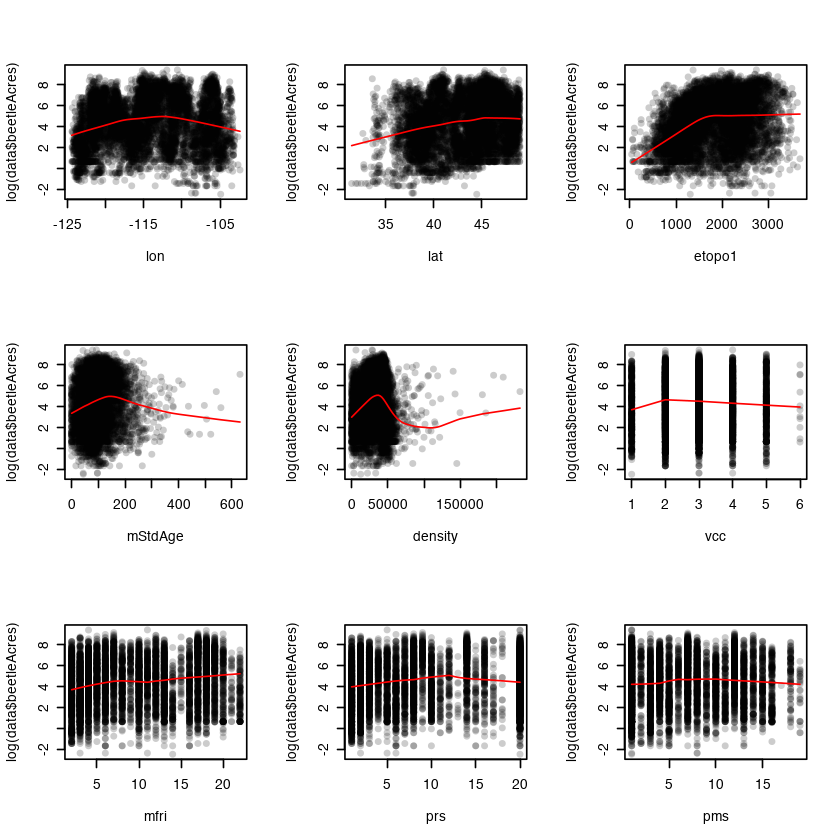

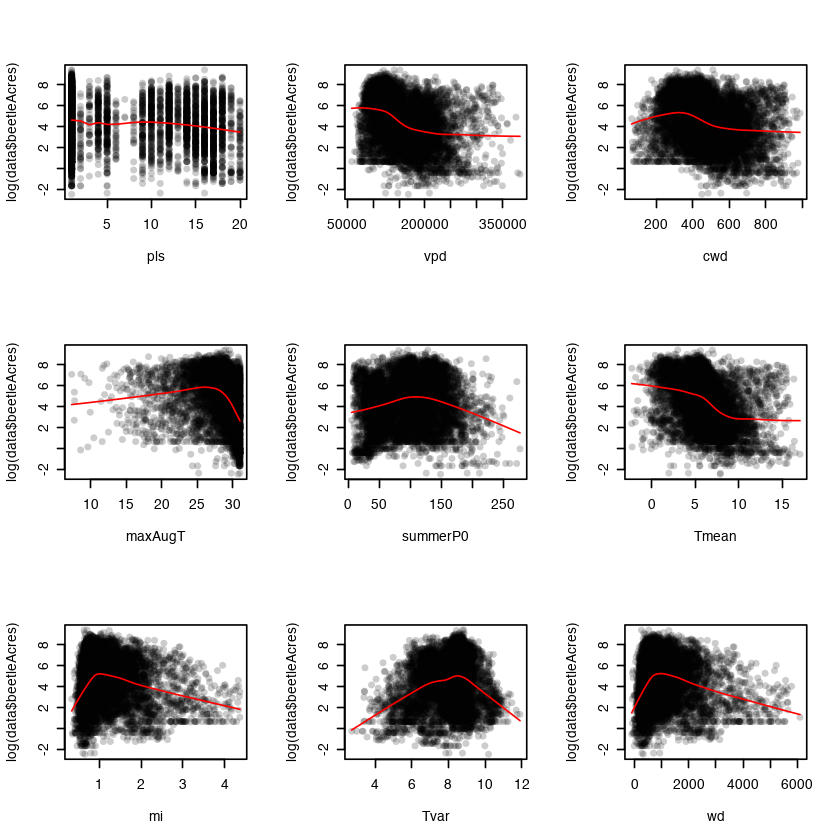

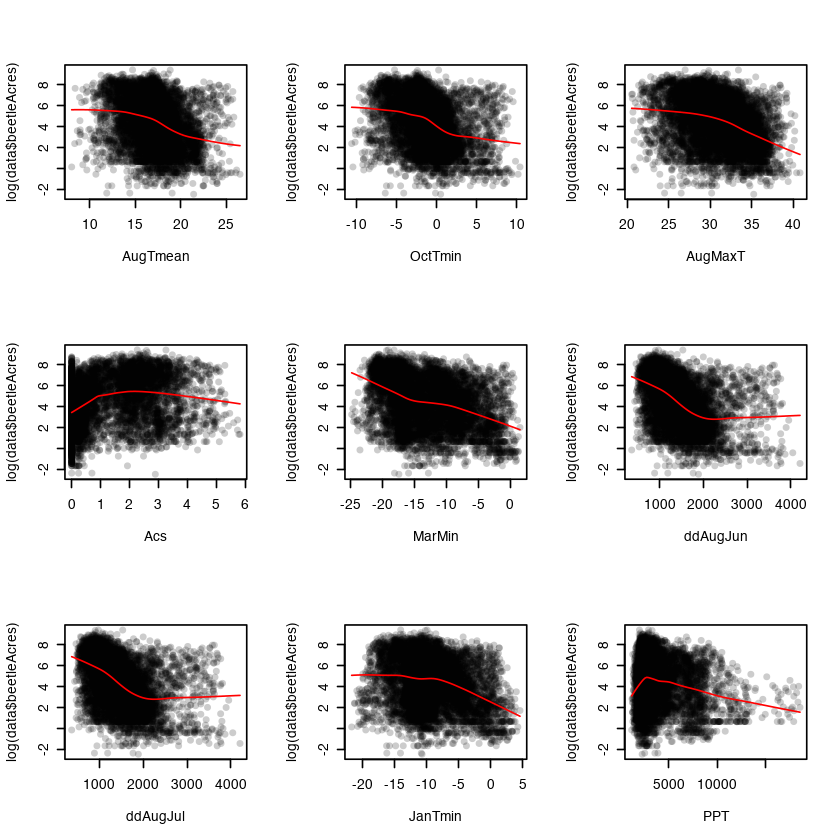

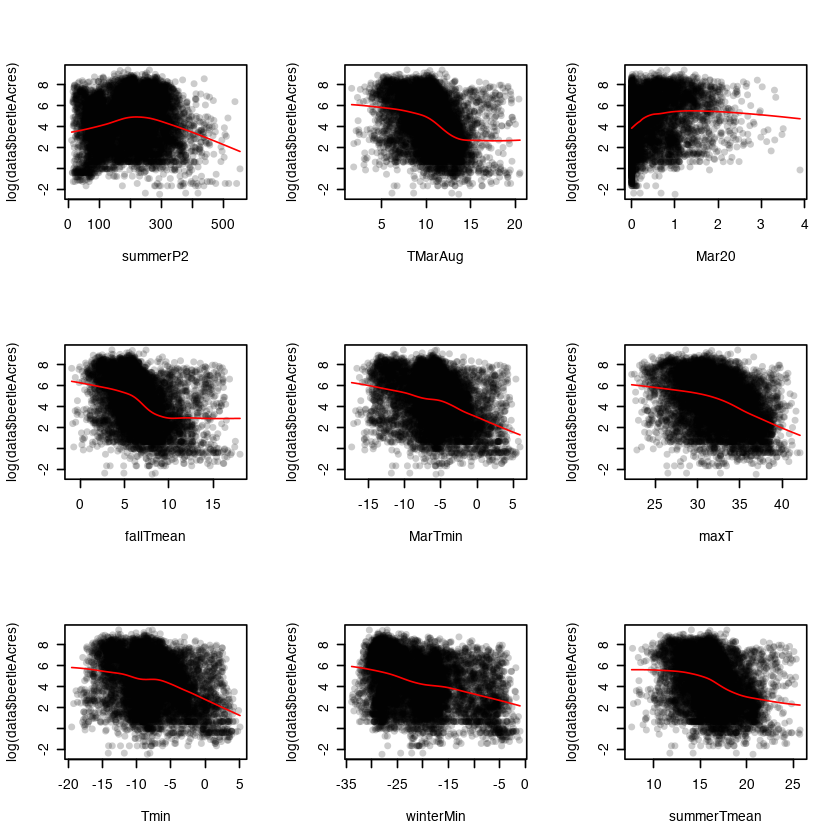

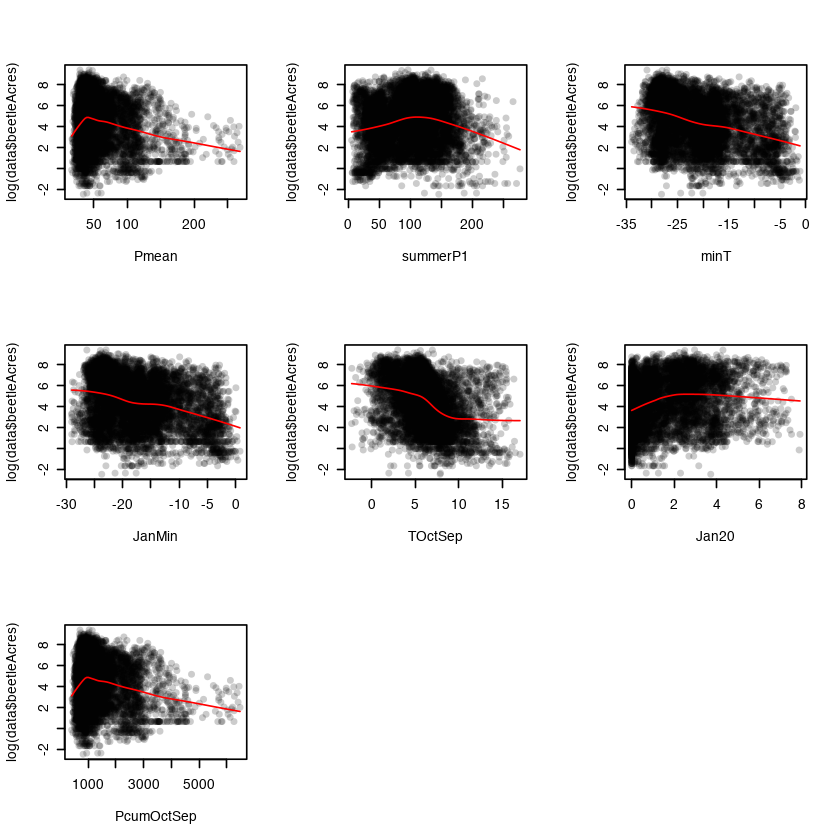

In [6]:
par(mfrow=c(3, 3))
for (field in smoothed) {
  plot(log(data$beetleAcres) ~ data[, field], 
       pch=16, 
       col=rgb(0, 0, 0, 0.2),
       xlab=field)
  lines(lowess(log(data$beetleAcres) ~ data[, field]), col=2)
}

In [29]:
mod <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2),
    data=data)

In [30]:
mod.r <- step(mod, trace=0)

In [15]:
summary(mod.r)


Call:
lm(formula = log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + 
    GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + I(cwd^2) + I(maxAugT^2) + 
    I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + 
    mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + 
    OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2) + AugTmax + 
    Acs + I(Acs^2) + MarMin + ddAugJun + ddAugJul + I(ddAugJul^2) + 
    PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + 
    I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + 
    I(summerP1^2) + minT + JanMin + I(JanMin^2) + TOctSep + Jan20 + 
    I(Jan20^2) + PcumOctSep + I(PcumOctSep^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3227 -1.0371  0.1295  1.1275  7.8009 

Coefficients:
          

In [16]:
library(rcompanion)
y <- data[,'beetleAcres']
y.tuk <- transformTukey(sample(y,5000),plotit=FALSE)


    lambda      W Shapiro.p.value
403   0.05 0.9811       2.637e-25

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



In [17]:
mod <- lm(
    beetleAcres^0.05 ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2),
    data=data)

In [18]:
mod.r <- step(mod, trace=0)

In [19]:
summary(mod.r)


Call:
lm(formula = beetleAcres^0.05 ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + 
    GAP1 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + I(maxAugT^2) + 
    I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + 
    mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + 
    OctTmin + I(OctTmin^2) + I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + 
    MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + 
    PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + 
    maxT + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + 
    I(summerP1^2) + minT + I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + 
    PcumOctSep + I(PcumOctSep^2), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38152 -0.06573  0.00487  0.07039  0.49218 

Coefficients:
         

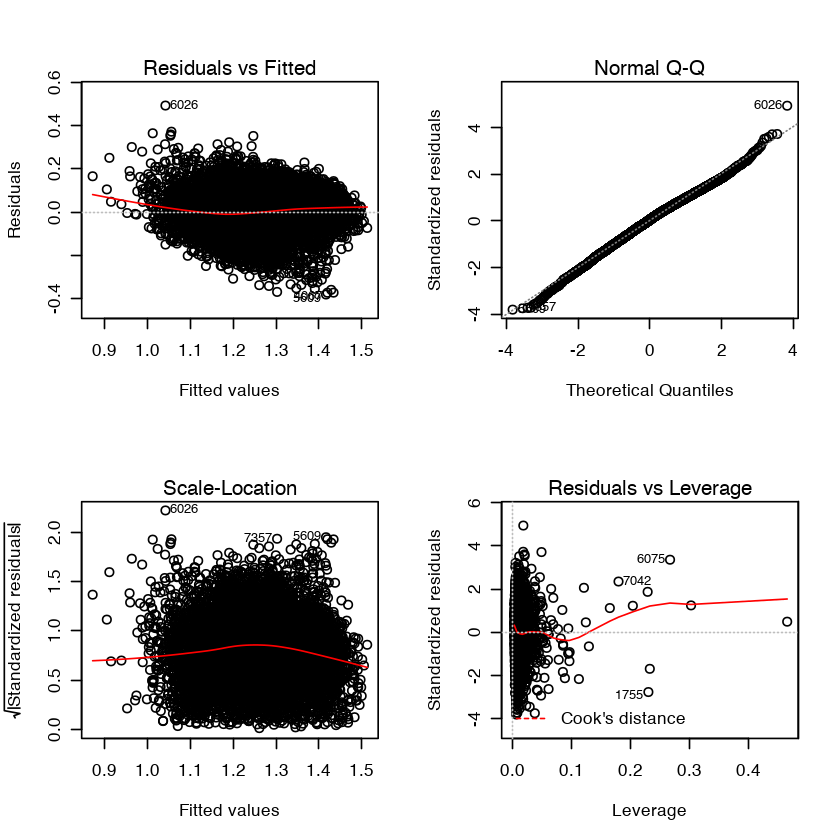

In [20]:
par(mfrow=c(2, 2))
plot(mod.r)

In [21]:
data$preds <- mod.r$fitted

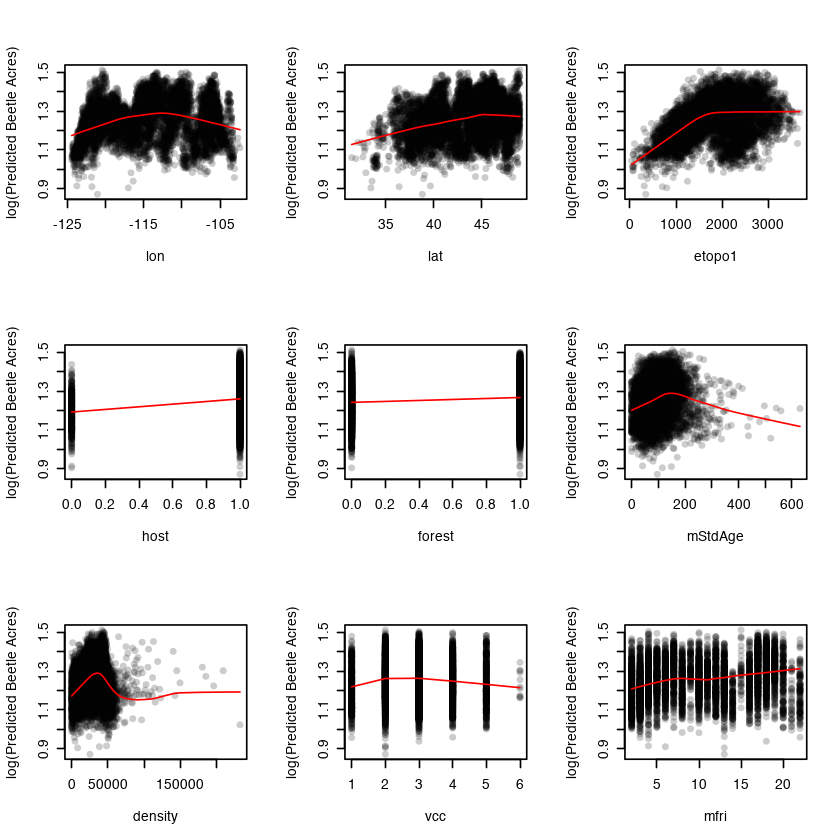

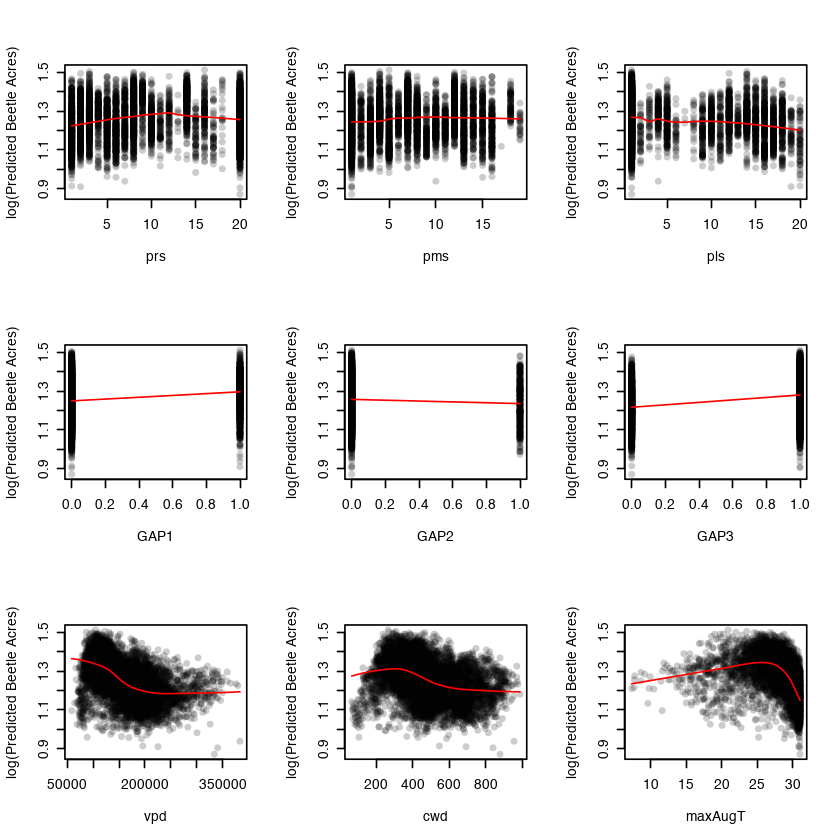

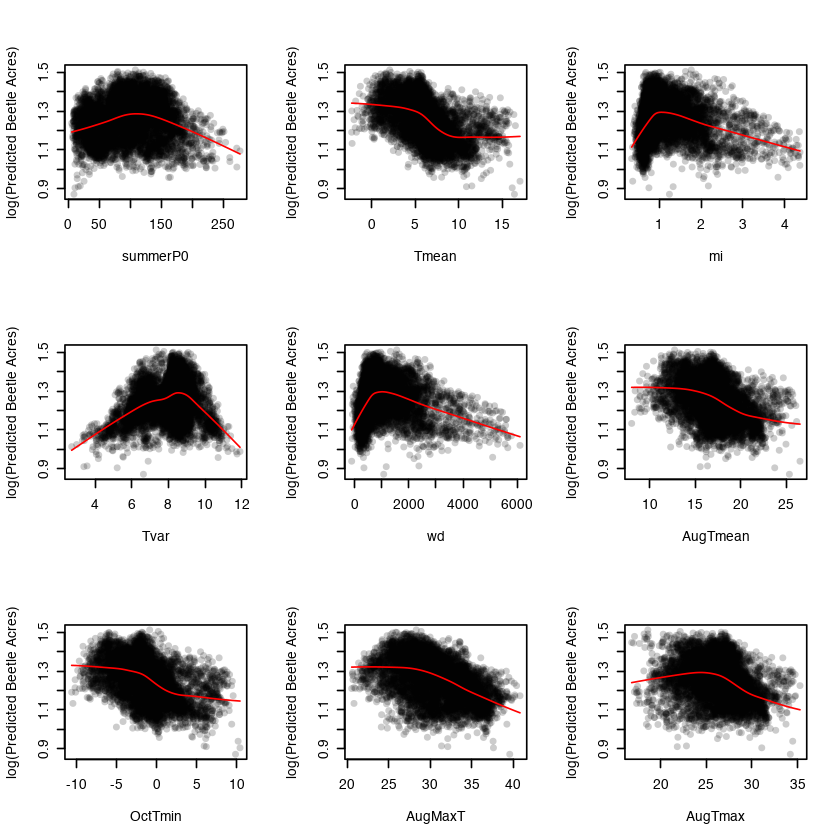

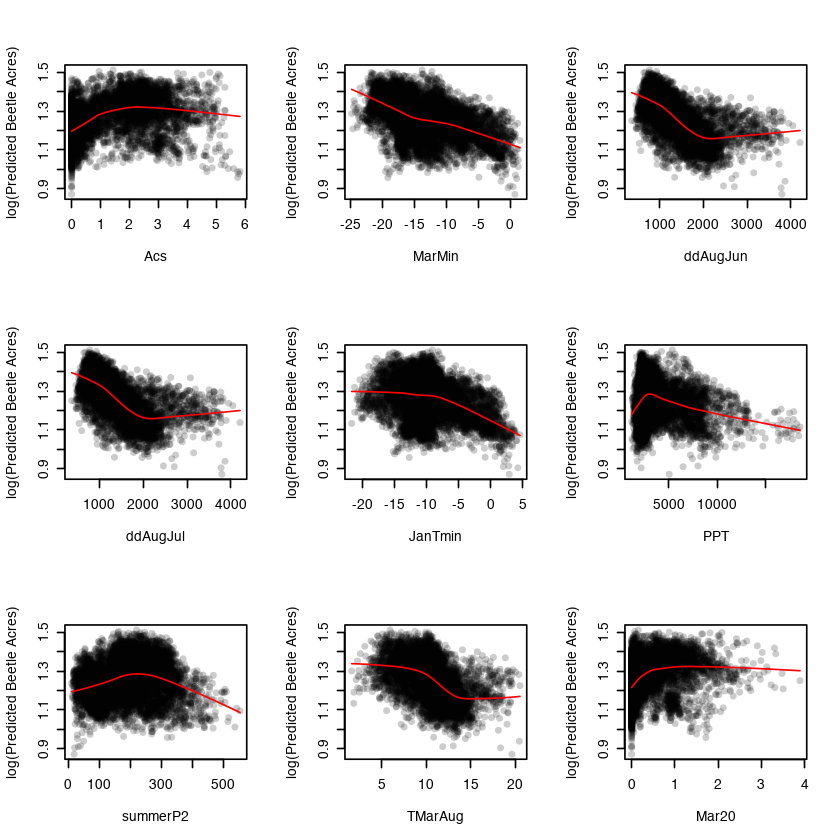

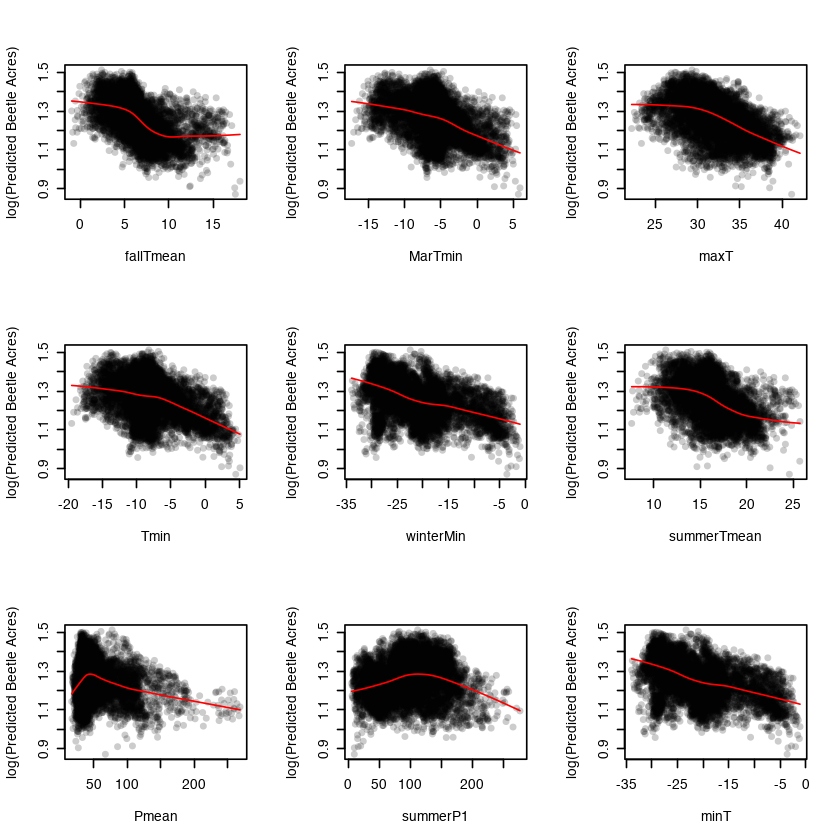

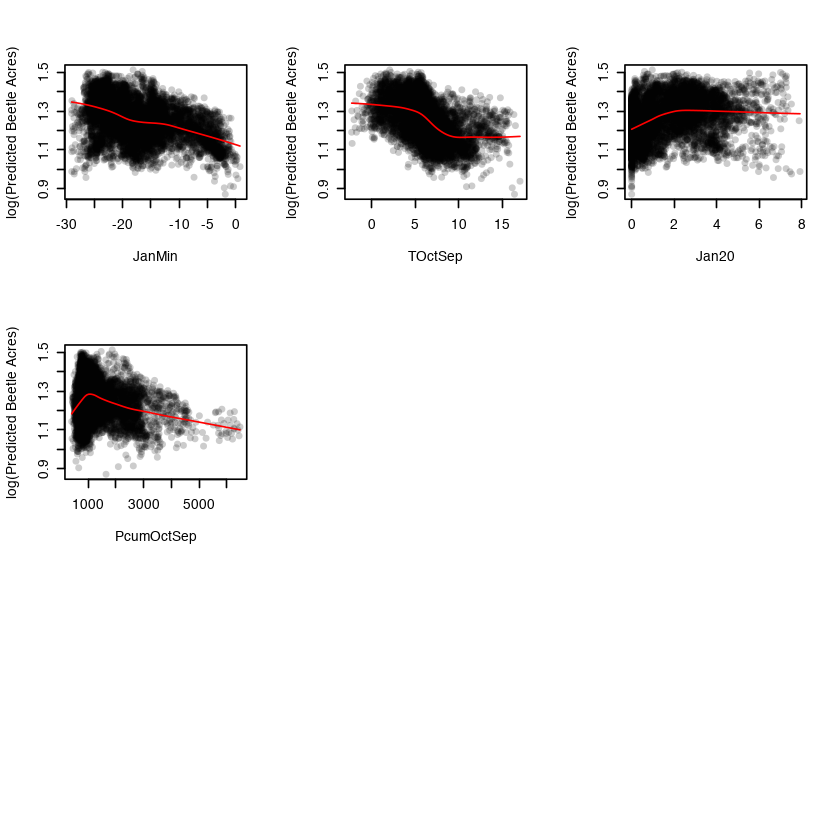

In [24]:
par(mfrow=c(3, 3))
for (field in names(data)) {
  if (!(field %in% c('beetleAcres', 'preds'))) {
    plot(data$preds ~ data[, field], 
         pch=16, 
         col=rgb(0, 0, 0, 0.2), 
         xlab=field,
         ylab='log(Predicted Beetle Acres)')
    lines(lowess(data$preds ~ data[, field]), col=2)
  }
}

In [32]:
med.df <- data.frame(t(apply(data, 2, median)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps), ]

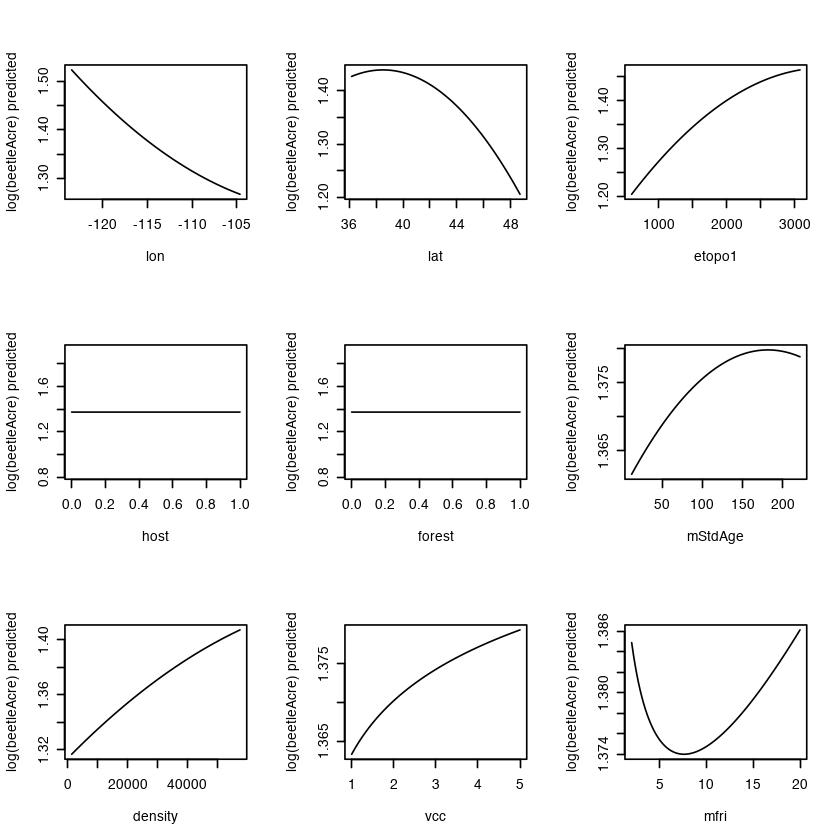

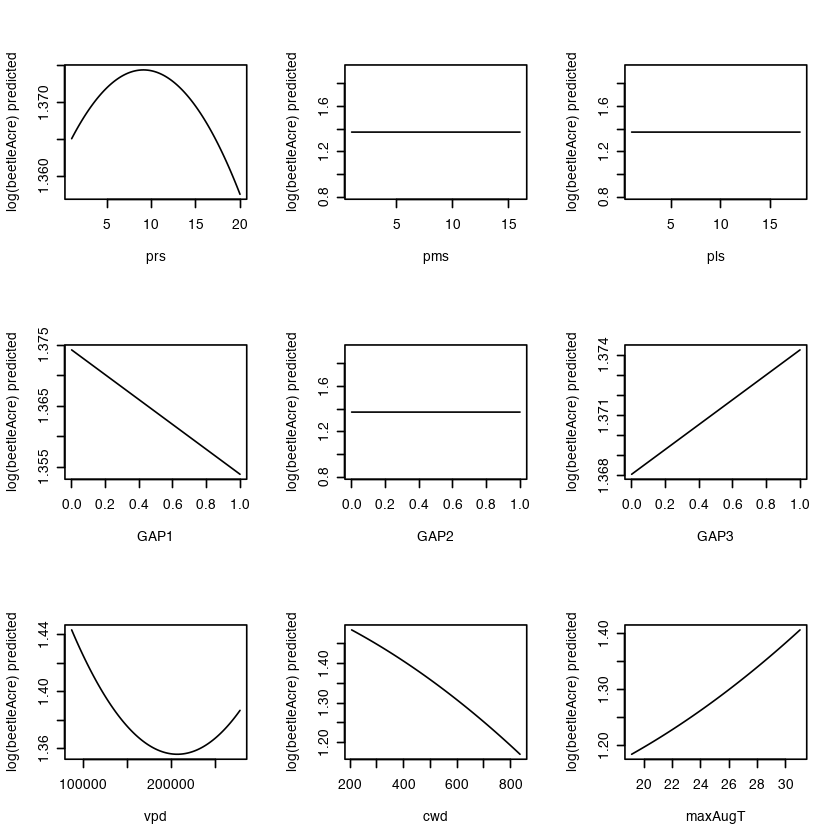

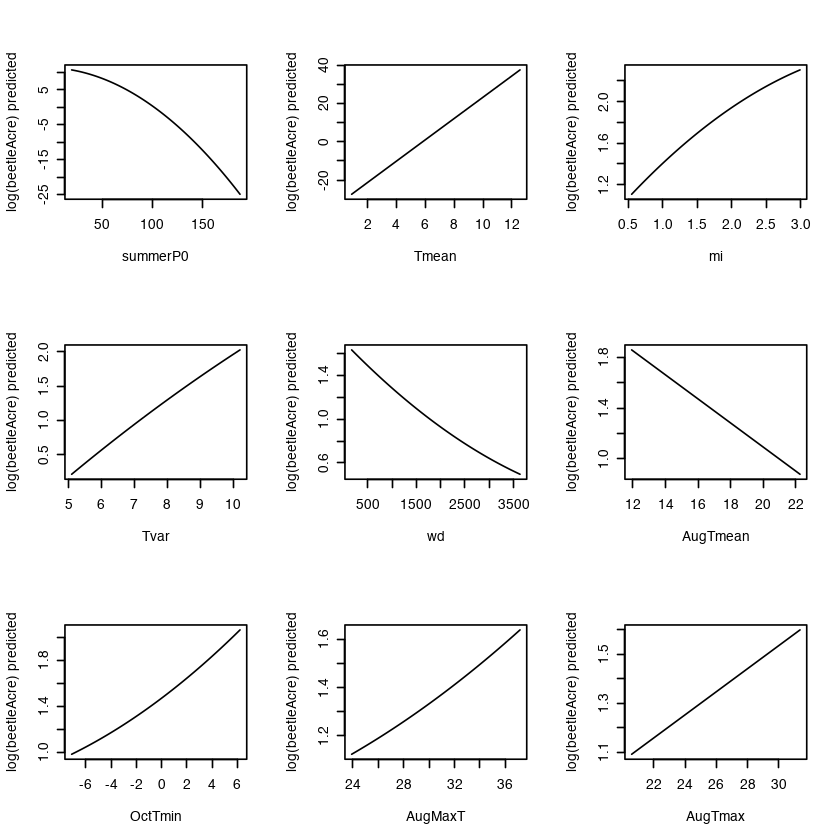

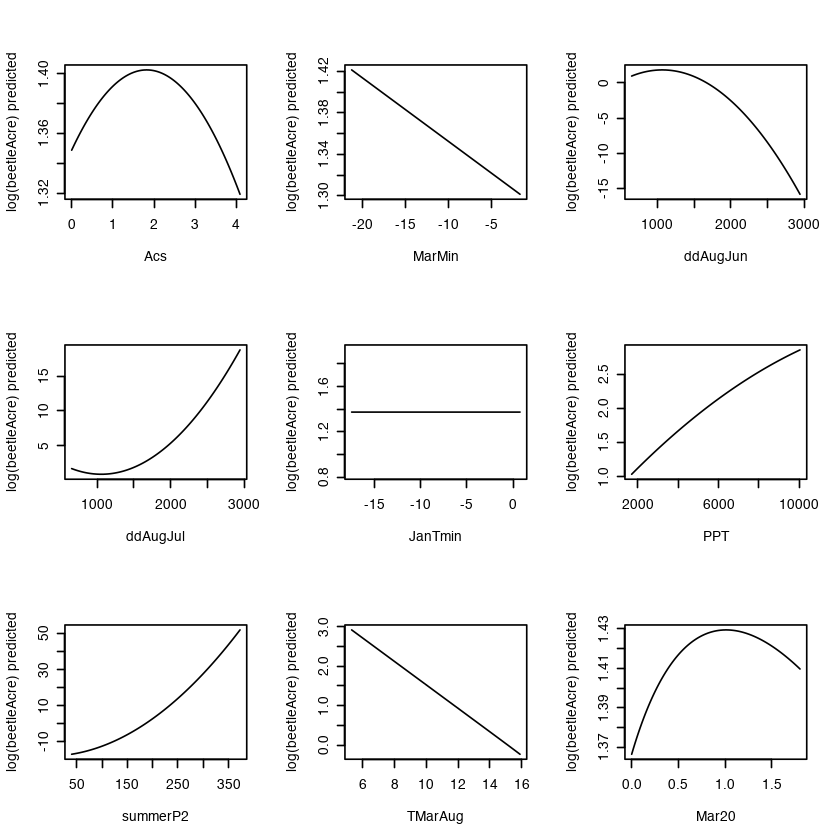

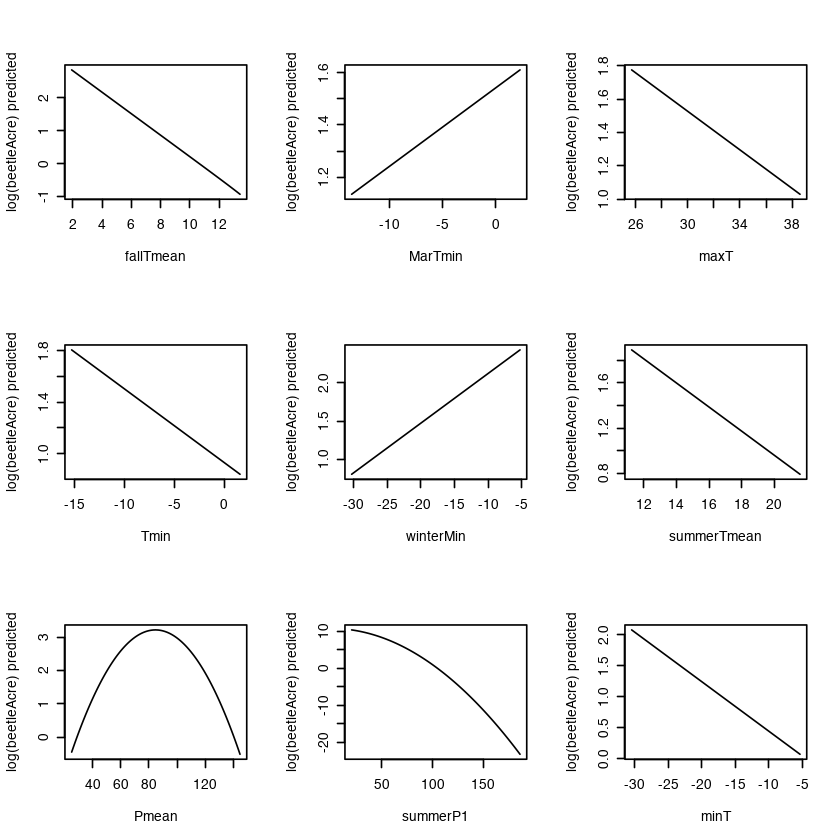

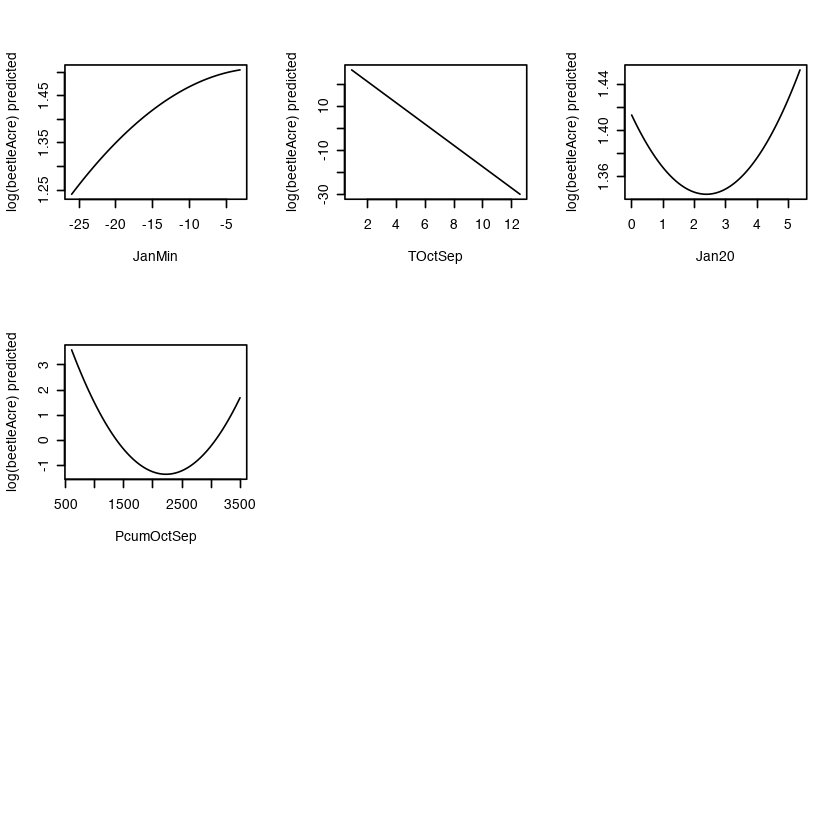

In [26]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- predict(mod.r, newdata=test.df)
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='log(beetleAcre) predicted')
  }
}

In [31]:
# logarithm of beetle data
mod.r <- lm(log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + 
    GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + I(cwd^2) + I(maxAugT^2) + 
    I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + 
    mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + 
    OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2) + AugTmax + 
    Acs + I(Acs^2) + MarMin + ddAugJun + ddAugJul + I(ddAugJul^2) + 
    PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + 
    I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + 
    I(summerP1^2) + minT + JanMin + I(JanMin^2) + TOctSep + Jan20 + 
    I(Jan20^2) + PcumOctSep + I(PcumOctSep^2), data = data)

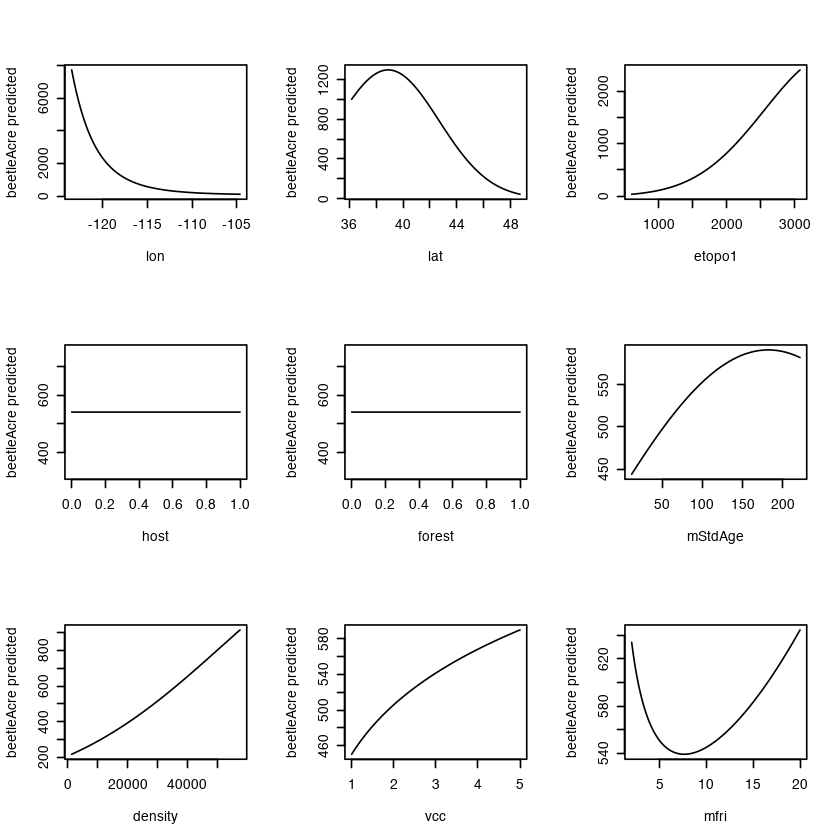

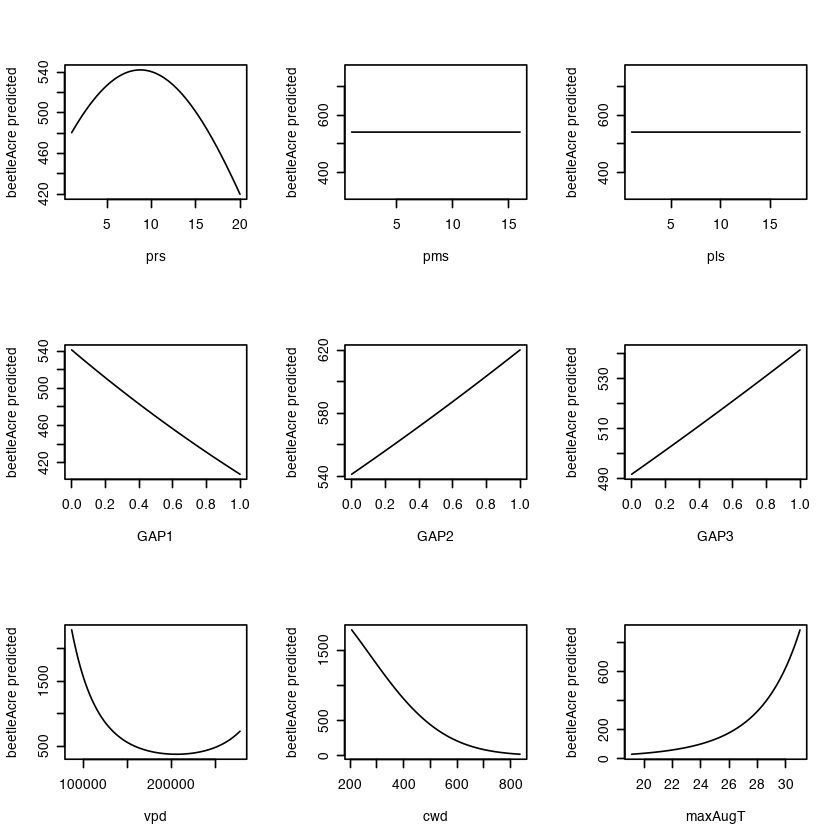

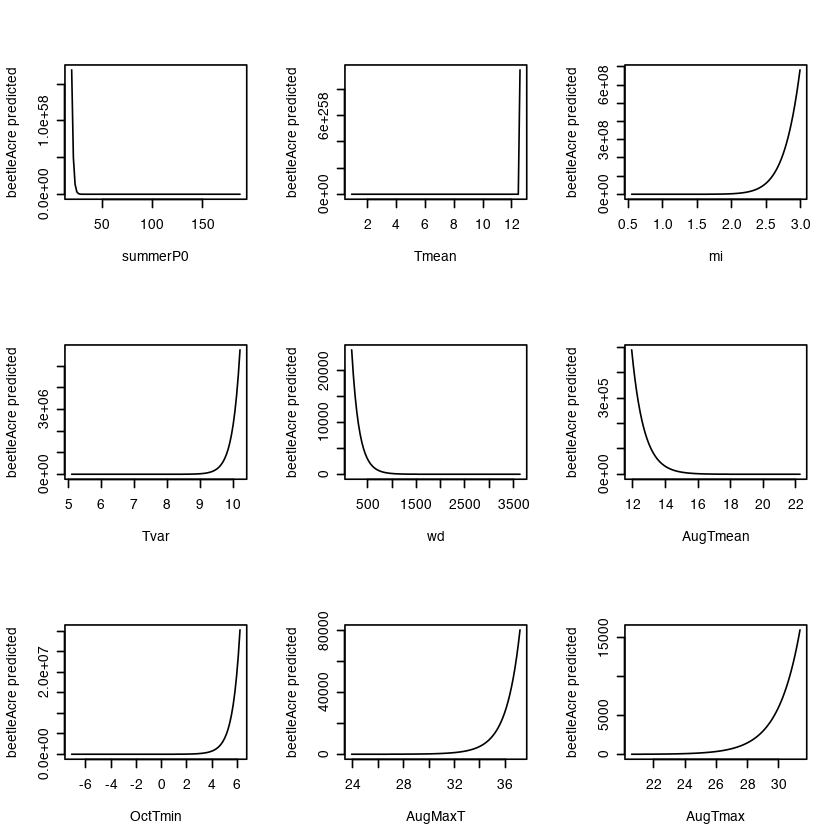

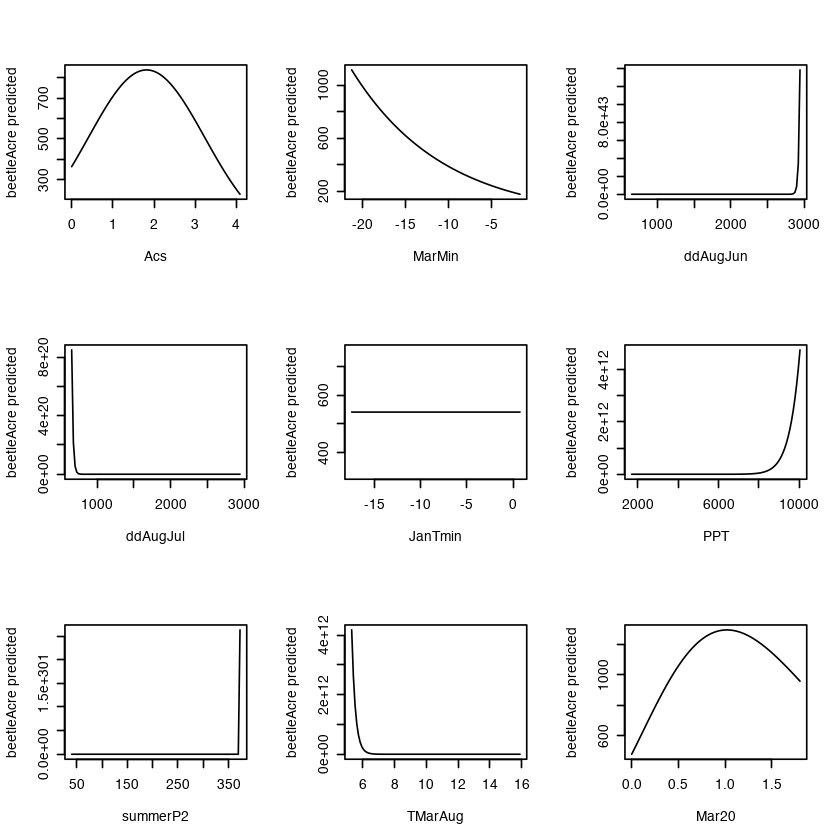

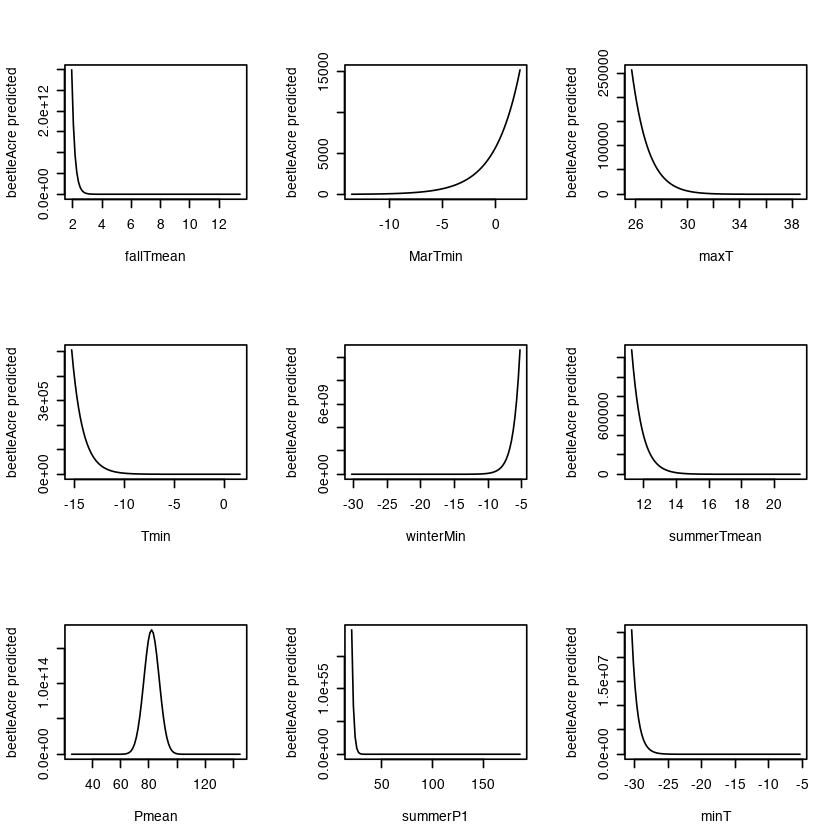

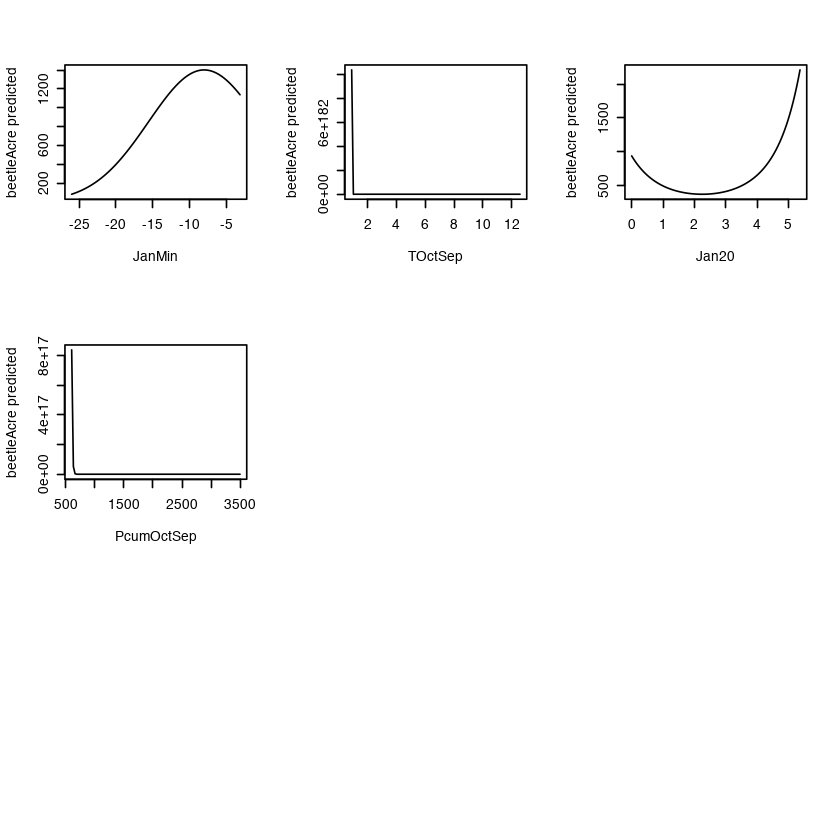

In [33]:
m <- data.frame(matrix(, nrow = 100, ncol = 18))
colnames(m) <- c('mStdAge', 'mStdAge.y', 'density', 'density.y', 'vcc', 'vcc.y', 
                 'mfri', 'mfri.y', 'prs', 'prs.y', 'GAP1', 'GAP1.y','GAP3', 'GAP3.y')
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- exp(predict(mod.r, newdata=test.df))
    i <- 1
    if(field %in% c('mStdAge', 'density', 'vcc', 'mfri', 'prs', 'GAP1', 'GAP3')){
        m[,field] <- test.df[, field]
        m[,paste0(field,'.y')] <- preds
        i <- i + 1
    }
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='beetleAcre predicted')
  }
}
write.csv(m, sprintf('%s/plot_2D_forestdata.csv', DATA), row.names=FALSE)

In [38]:
sq_terms <- c('lon', 'lat', 'etopo1', 'density', 'mStdAge', 'density', 'prs', 'vpd', 'cwd', 'maxAugT', 'summerP0', 
              'Tmean', 'mi','Tvar', 'wd', 'OctTmin', 'AugMaxT', 'Acs', 'ddAugJun', 'ddAugJul', 
              'PPT', 'summerP2', 'Pmean', 'summerP1', 'JanMin', 'Jan20', 'PcumOctSep')
exp_terms <- c('Tmean', 'TMarAug', 'fallTmean')
logp1_terms <- 'Mar20'
for(var in sq_terms){
    varnm <- paste0(var, '_sq')
    data[,varnm] <- (data[,var])^2
    cat(sprintf('Calculated %s in a squared term...\n', var))
}

for(var in exp_terms){
    varnm <- paste0(var, '_exp')
    data[,varnm] <- exp(data[,var])
    cat(sprintf('Calculated %s in a exponential term...\n', var))
}

for(var in logp1_terms){
    varnm <- paste0(var, '_logp1')
    data[,varnm] <- log(data[,var]+1)
    cat(sprintf('Calculated %s in a logarithm term...\n', var))
}

Calculated lon in a squared term...
Calculated lat in a squared term...
Calculated etopo1 in a squared term...
Calculated density in a squared term...
Calculated mStdAge in a squared term...
Calculated density in a squared term...
Calculated prs in a squared term...
Calculated vpd in a squared term...
Calculated cwd in a squared term...
Calculated maxAugT in a squared term...
Calculated summerP0 in a squared term...
Calculated Tmean in a squared term...
Calculated mi in a squared term...
Calculated Tvar in a squared term...
Calculated wd in a squared term...
Calculated OctTmin in a squared term...
Calculated AugMaxT in a squared term...
Calculated Acs in a squared term...
Calculated ddAugJun in a squared term...
Calculated ddAugJul in a squared term...
Calculated PPT in a squared term...
Calculated summerP2 in a squared term...
Calculated Pmean in a squared term...
Calculated summerP1 in a squared term...
Calculated JanMin in a squared term...
Calculated Jan20 in a squared term...
Calc

In [39]:
selected.vars <- c('lon', 'lat', 'etopo1', 'mStdAge', 'density', 'mfri', 'prs', 'GAP1', 'GAP3', 'vpd', 'cwd',
                   'summerP0', 'Tmean', 'mi', 'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugTmax', 'Acs',
                   'MarMin', 'dAugJun', 'ddAugJul', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 
                   'MarTmin', 'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'minT', 'TOctSep', 'Jan20', 
                   'PcumOctSep', paste0(sq_terms, '_sq'), paste0(exp_terms, '_exp'), paste0(logp1_terms, '_logp1'))
predictors <- data[ , (names(data) %in% selected.vars)]
predictors <- scale(predictors)
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- log(df$beetleAcres)

In [40]:
mod <- lm(beetleAcres ~ ., data=df)

In [41]:
mod.r <- step(mod, trace=0)

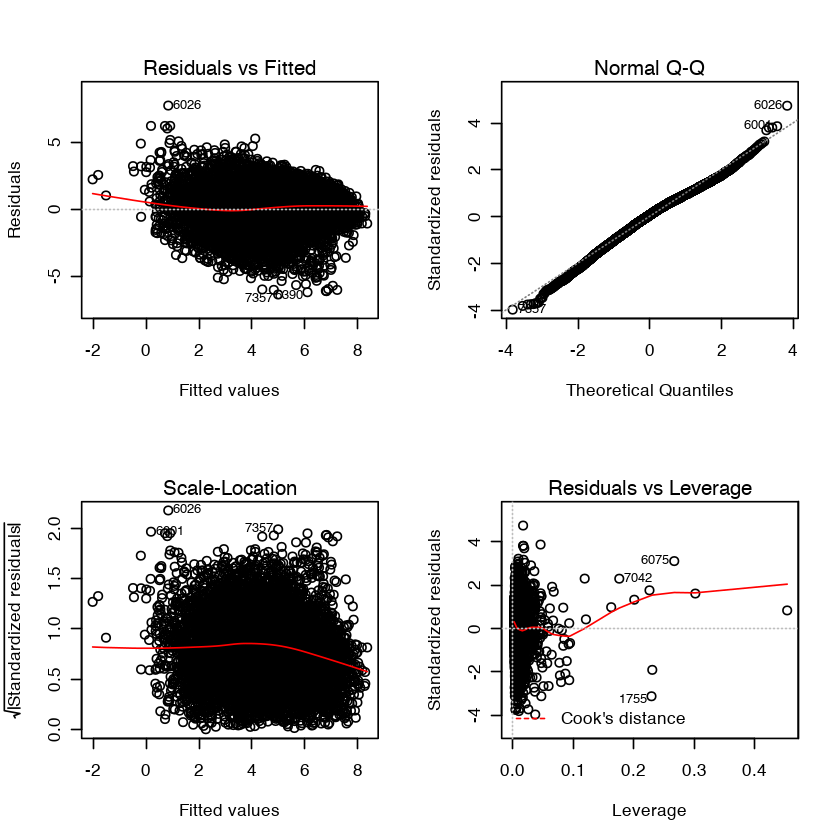

In [42]:
par(mfrow=c(2, 2))
plot(mod.r)

In [43]:
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lon + lat + etopo1 + mStdAge + density + 
    GAP1 + GAP3 + vpd + summerP0 + Tmean + mi + Tvar + wd + AugTmean + 
    OctTmin + AugTmax + Acs + MarMin + PPT + summerP2 + TMarAug + 
    Mar20 + fallTmean + MarTmin + Tmin + winterMin + summerTmean + 
    Pmean + minT + TOctSep + Jan20 + PcumOctSep + lon_sq + lat_sq + 
    etopo1_sq + density_sq + mStdAge_sq + prs_sq + vpd_sq + cwd_sq + 
    maxAugT_sq + summerP0_sq + Tmean_sq + mi_sq + Tvar_sq + wd_sq + 
    OctTmin_sq + AugMaxT_sq + Acs_sq + ddAugJun_sq + ddAugJul_sq + 
    PPT_sq + summerP2_sq + Pmean_sq + summerP1_sq + JanMin_sq + 
    Jan20_sq + PcumOctSep_sq + Tmean_exp + TMarAug_exp + fallTmean_exp + 
    Mar20_logp1, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-6.381 -1.051  0.134  1.149  7.721 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.41981    0.01880 235.041  < 2e-16 ***
lon             16.76274    2.63811   6.354 2.22e-10 ***
lat 

In [44]:
sort(abs(mod.r$coefficients))

GAP3        prs_sq          GAP1    mStdAge_sq       mStdAge 
   0.03395852    0.07709173    0.09929299    0.15269437    0.18524178 
   density_sq   TMarAug_exp        MarMin       density    AugMaxT_sq 
   0.26823706    0.30395626    0.43184135    0.60350808    0.62421147 
   OctTmin_sq fallTmean_exp    maxAugT_sq           Acs     Tmean_exp 
   0.62462469    0.69791863    0.77500436    0.81817776    0.84745729 
        Jan20        Acs_sq      Tmean_sq        cwd_sq     etopo1_sq 
   0.94784397    1.01271739    1.03466348    1.17663762    1.21764001 
     Jan20_sq       MarTmin         Mar20         wd_sq     JanMin_sq 
   1.37070931    1.43329277    1.44927718    1.56028523    1.72258787 
  Mar20_logp1        vpd_sq       AugTmax        etopo1           vpd 
   1.74254422    2.06412415    2.11195819    2.37005606    2.40012951 
        mi_sq       Tvar_sq          Tmin      AugTmean       OctTmin 
   2.54808306    3.31761585    3.34603215    3.40088141    4.24825131 
  (Intercept)            wd        PPT_sq   summerTmean            mi 
   4.41981230    5.35293645    5.51995716    6.03443872    6.65298677 
    winterMin           lat          minT        lat_sq      summerP2 
   6.78170639    8.46858482    8.67388459    9.49862033   10.75344031 
     summerP0          Tvar       TMarAug     fallTmean           PPT 
  10.90939355   11.10585894   12.20642026   14.46931561   14.56431807 
          lon        lon_sq   ddAugJul_sq   ddAugJun_sq         Pmean 
  16.76274241   18.07870872   67.95417238   69.02041192   71.51780365 
   PcumOctSep      Pmean_sq PcumOctSep_sq   summerP0_sq   summerP1_sq 
  88.32019687   89.11498368   96.47193498  130.46265270  132.49397268 
      TOctSep   summerP2_sq         Tmean 
 234.40282092  262.65920767  268.35032945

In [45]:
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- (df$beetleAcres)^0.05
mod <- lm(beetleAcres ~ ., data=df)
mod.r <- step(mod, trace=0)
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lon + lat + etopo1 + mStdAge + density + 
    GAP1 + GAP3 + vpd + summerP0 + Tmean + mi + Tvar + wd + AugTmean + 
    OctTmin + AugTmax + Acs + MarMin + PPT + summerP2 + TMarAug + 
    Mar20 + fallTmean + MarTmin + Tmin + winterMin + summerTmean + 
    Pmean + minT + TOctSep + Jan20 + PcumOctSep + lon_sq + lat_sq + 
    etopo1_sq + density_sq + mStdAge_sq + prs_sq + vpd_sq + cwd_sq + 
    maxAugT_sq + summerP0_sq + Tmean_sq + mi_sq + Tvar_sq + wd_sq + 
    OctTmin_sq + AugMaxT_sq + Acs_sq + ddAugJun_sq + ddAugJul_sq + 
    PPT_sq + summerP2_sq + Pmean_sq + summerP1_sq + JanMin_sq + 
    Jan20_sq + PcumOctSep_sq + Tmean_exp + TMarAug_exp + fallTmean_exp + 
    Mar20_logp1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37343 -0.06629  0.00497  0.07194  0.49299 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     1.255548   0.001158 1084.486  < 2e-16 ***
lon             0.985614   0.162421    

In [46]:
sort(abs(mod.r$coefficients))

GAP3        prs_sq          GAP1    mStdAge_sq       mStdAge 
  0.002262028   0.004714943   0.006843279   0.009930666   0.011991129 
   density_sq   TMarAug_exp        MarMin    OctTmin_sq       density 
  0.017085799   0.019498919   0.029194811   0.036944466   0.038408354 
   AugMaxT_sq fallTmean_exp    maxAugT_sq     Tmean_exp      Tmean_sq 
  0.038669301   0.041905132   0.049516694   0.051659057   0.056865161 
          Acs        Acs_sq         Jan20        cwd_sq     etopo1_sq 
  0.056965127   0.067038574   0.069041931   0.074418451   0.074647211 
     Jan20_sq       MarTmin         Mar20         wd_sq     JanMin_sq 
  0.090807813   0.092092909   0.094819370   0.096560276   0.104708528 
  Mar20_logp1        vpd_sq       AugTmax        etopo1           vpd 
  0.115561936   0.131217596   0.138086843   0.146638723   0.152016755 
        mi_sq       Tvar_sq          Tmin      AugTmean       OctTmin 
  0.158791840   0.196246270   0.204283878   0.229167562   0.271722122 
       PPT_sq            wd   summerTmean            mi     winterMin 
  0.295084204   0.330170497   0.355449189   0.411409333   0.446845370 
          lat          minT        lat_sq      summerP2      summerP0 
  0.527702374   0.564195231   0.596337088   0.629961672   0.640185958 
         Tvar       TMarAug           PPT     fallTmean           lon 
  0.671156055   0.743957568   0.854092706   0.897795444   0.985613895 
       lon_sq   (Intercept)   ddAugJul_sq   ddAugJun_sq         Pmean 
  1.070759707   1.255548117   3.774581688   3.841431336   4.637548951 
     Pmean_sq    PcumOctSep PcumOctSep_sq   summerP0_sq   summerP1_sq 
  5.544964932   5.633441593   5.955591715   9.901679455  10.016669768 
      TOctSep         Tmean   summerP2_sq 
 14.711752262  16.777890272  19.897613245

In [47]:
sort(mod.r$coefficients)

TOctSep   summerP1_sq   summerP0_sq    PcumOctSep      Pmean_sq 
-14.711752262 -10.016669768  -9.901679455  -5.633441593  -5.544964932 
  ddAugJul_sq     fallTmean       TMarAug      summerP0        lat_sq 
 -3.774581688  -0.897795444  -0.743957568  -0.640185958  -0.596337088 
         minT   summerTmean            wd        PPT_sq      AugTmean 
 -0.564195231  -0.355449189  -0.330170497  -0.295084204  -0.229167562 
         Tmin       Tvar_sq         mi_sq           vpd     JanMin_sq 
 -0.204283878  -0.196246270  -0.158791840  -0.152016755  -0.104708528 
        Mar20     etopo1_sq        cwd_sq         Jan20        Acs_sq 
 -0.094819370  -0.074647211  -0.074418451  -0.069041931  -0.067038574 
     Tmean_sq fallTmean_exp    AugMaxT_sq        MarMin   TMarAug_exp 
 -0.056865161  -0.041905132  -0.038669301  -0.029194811  -0.019498919 
   density_sq    mStdAge_sq          GAP1        prs_sq          GAP3 
 -0.017085799  -0.009930666  -0.006843279  -0.004714943   0.002262028 
      mStdAge    OctTmin_sq       density    maxAugT_sq     Tmean_exp 
  0.011991129   0.036944466   0.038408354   0.049516694   0.051659057 
          Acs      Jan20_sq       MarTmin         wd_sq   Mar20_logp1 
  0.056965127   0.090807813   0.092092909   0.096560276   0.115561936 
       vpd_sq       AugTmax        etopo1       OctTmin            mi 
  0.131217596   0.138086843   0.146638723   0.271722122   0.411409333 
    winterMin           lat      summerP2          Tvar           PPT 
  0.446845370   0.527702374   0.629961672   0.671156055   0.854092706 
          lon        lon_sq   (Intercept)   ddAugJun_sq         Pmean 
  0.985613895   1.070759707   1.255548117   3.841431336   4.637548951 
PcumOctSep_sq         Tmean   summerP2_sq 
  5.955591715  16.777890272  19.897613245

In [27]:
write.csv(df, sprintf('%s/mpb10km_data_wo_FIA_scaled.csv', DATA), row.names=FALSE)